In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
test_predictions_path = 'test_predictions.xlsx'
utm_predictions_path = 'UTM_predictions.xlsx'


In [19]:
test_predictions = pd.read_excel(test_predictions_path)
test_predictions['DateTime'] = pd.to_datetime(test_predictions['DateTime'])

utm_predictions = pd.read_excel(utm_predictions_path)
utm_predictions['DateTime'] = pd.to_datetime(utm_predictions['DateTime'])

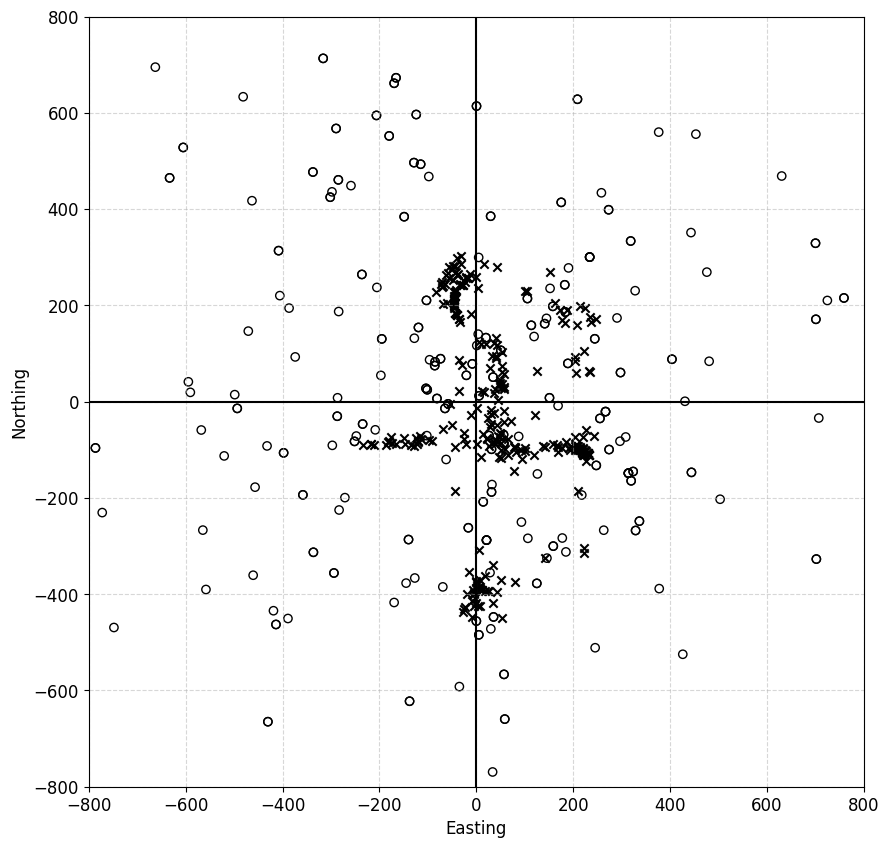

In [45]:
# Plot of the error on a tower by tower basis

plt.rcdefaults()  # Reset the style to default

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(test_predictions['xOffset'], test_predictions['yOffset'], marker='o', color='black', facecolors='none', edgecolors='black')
ax.scatter(test_predictions['xOffset_pred'], test_predictions['yOffset_pred'], marker='x', color='black')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')

# Adjust the font sizes for better visibility
ax.tick_params(axis='both', which='both', labelsize=12)

# Adjust the axis labels font size
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Add horizontal and vertical grid
ax.grid(True, linestyle='--', alpha=0.5)

# Make the lines that go through 0 solid and thicker
ax.axhline(0, color='black', linewidth=1.5)
ax.axvline(0, color='black', linewidth=1.5)

# Set the background color to white
ax.set_facecolor('white')

# Set the maximum x and y distance
ax.set_xlim(-800, 800)
ax.set_ylim(-800, 800)

# Save the figure with high resolution (300 dpi)
# plt.savefig('predicted_vs_actual_locations.png', dpi=300, bbox_inches='tight')

plt.show()


In [47]:
# Plot of overall error of points

utm_predictions['easting_error'] = utm_predictions['easting_pred'] - utm_predictions['easting']
utm_predictions['northing_error'] = utm_predictions['northing_pred'] - utm_predictions['northing']

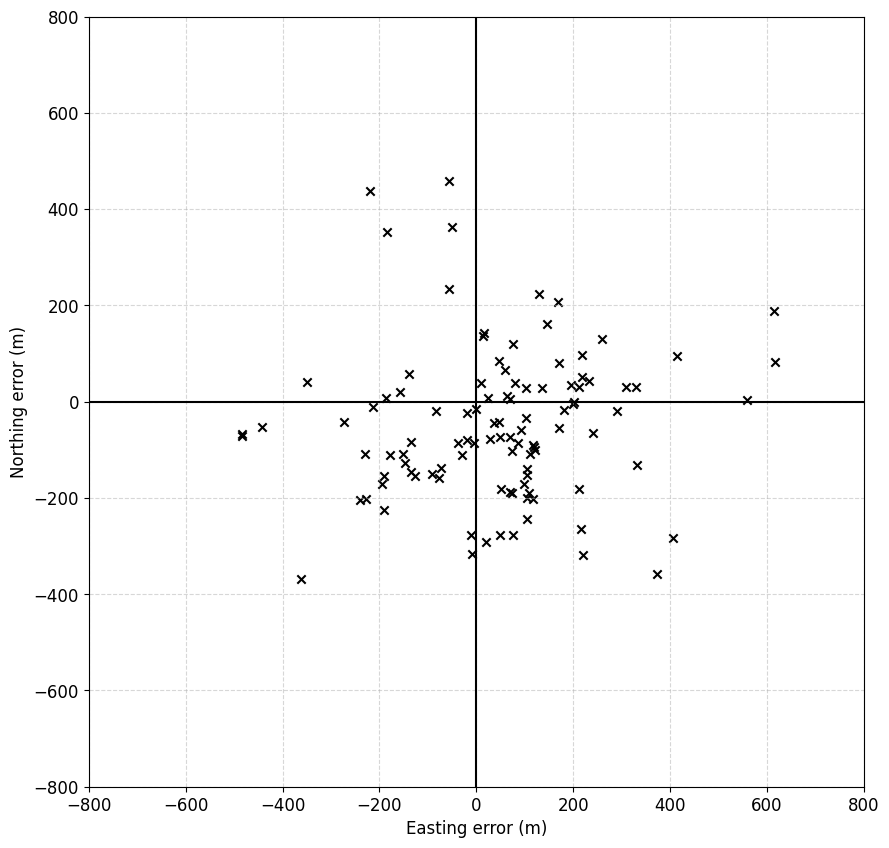

In [49]:
# Plot of overall error of points
plt.rcdefaults()  # Reset the style to default

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(utm_predictions['easting_error'], utm_predictions['northing_error'], marker='x', color='black')
ax.set_xlabel('Easting error (m)')
ax.set_ylabel('Northing error (m)')

# Adjust the font sizes for better visibility
ax.tick_params(axis='both', which='both', labelsize=12)

# Adjust the axis labels font size
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)

# Add horizontal and vertical grid
ax.grid(True, linestyle='--', alpha=0.5)

# Make the lines that go through 0 solid and thicker
ax.axhline(0, color='black', linewidth=1.5)
ax.axvline(0, color='black', linewidth=1.5)

# Set the background color to white
ax.set_facecolor('white')

# Set the maximum x and y distance
ax.set_xlim(-800, 800)
ax.set_ylim(-800, 800)

# Save the figure with high resolution (300 dpi)
# plt.savefig('predicted_vs_actual_locations.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Plot the distribution of the errors
def plot_error_distribution(distances):
    fig, ax = plt.subplots()
    ax.boxplot(distances)
    ax.set_ylabel('Distance (m)')
    ax.set_title('Distribution of errors')
    plt.show()

plot_error_distribution(UTM_predictions['distance'])